# **Week 0 Main Assignment**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [1]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    data = np.loadtxt(data_path, delimiter=',')
    return data

In [ ]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        idx = np.random.choice(np.arange(data.shape[0]), K)
    else:
        idx = init_centers
    return data[idx]

In [ ]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.ones_like(data[:, 0])

In [ ]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    return np.sum((np.expand_dims(data, axis=1) - np.expand_dims(centers, axis=0))**2, axis=2)

In [ ]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    return np.argmin(distances, axis=1)

In [66]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    tmp = np.arange(K)
    mask = np.expand_dims(labels, axis=1) == np.expand_dims(tmp, axis=0)
    updated_centroids = np.mean(np.expand_dims(mask, axis=2)*np.expand_dims(data, axis=1), axis=0)
    return updated_centroids

In [67]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.linalg.norm(labels1-labels2) < 1e-6

In [68]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [ ]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)
    plt.scatter(data[:,0], data[:, 1], c=labels)
    plt.scatter(centers[:, 0], centers[:, 1])
    # Scatter plot of the data points
    plt.title('K-means clustering')
    ### Set title as 'K-means clustering'
    plt.xlabel('Longitude')
    ### Set xlabel as 'Longitude'
    plt.ylabel('Latitude')
    ### Set ylabel as 'Latitude'
    plt.savefig('kmeans.png')
    ### Save the plot as 'kmeans.png'

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0021560192108154297


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

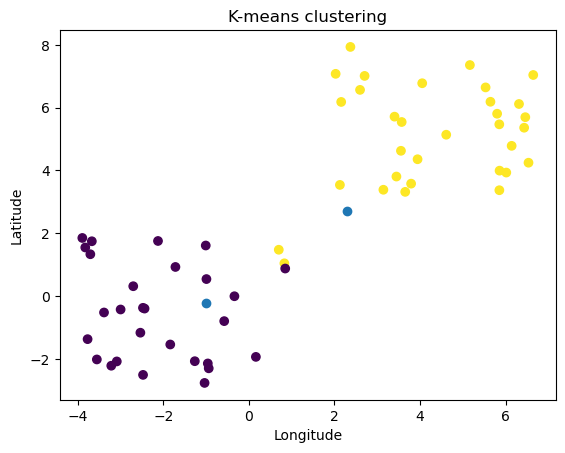

In [70]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)